In [10]:
import regex as re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def get_numbers_from_string(string):
    """Returns a list of all numbers in a string.
    Example: get_numbers_from_string('model_0.1_2_3') = [0.1, 2, 3]"""
    matches = re.findall(r'\d+(?:\.\d+)?', string)
    matches_numbers = [float(match) for match in matches]
    return matches_numbers

def get_unique_values(df, column_name):
    value_count = len(get_numbers_from_string(df[column_name][0]))
    value_matrix = np.zeros((len(df), value_count))
    for i, model_name in enumerate(df[column_name]):
        value_matrix[i] = get_numbers_from_string(model_name)
    unique_values = []
    for i in range(value_count):
        unique_values.append(np.unique(value_matrix[:, i]))
    return unique_values

def plot_in_1D(df, x_label, y_label, title):
    x_values = []
    y_values = []
    for model_name, validation_loss in zip(df['model'], df['validation_loss']):
        x = get_numbers_from_string(model_name)[0]
        y = validation_loss
        x_values.append(x)
        y_values.append(y)
    print("Correlation coefficient: ", np.corrcoef(x_values, y_values)[0, 1])
    print("Variance: ", np.var(y_values))
    plt.plot(x_values, y_values, 'o')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

def plot_in_2D(df, x_label, y_label, title):
    """Plots a validation loss matrix in 2D.
    First it calculates a dataframe with the x and y values
    and the validation loss as the z value. Then it plots the matrix."""
    # Create a matrix of validation loss values for all combinations of the two parameters
    unique_values = get_unique_values(df, 'model')
    # Try converting each column to int seperately
    for i in range(len(unique_values)):
        if unique_values[i][0].is_integer():
            unique_values[i] = unique_values[i].astype(int)
        
    validation_loss_matrix = np.zeros((len(unique_values[0]), len(unique_values[1])))
    for model_name, validation_loss in zip(df['model'], df['validation_loss']):
        x = get_numbers_from_string(model_name)[0]
        y = get_numbers_from_string(model_name)[1]
        if unique_values[0][0].is_integer():
            x = int(x)
        if unique_values[1][0].is_integer():
            y = int(y)
        validation_loss_matrix[unique_values[0].tolist().index(x), unique_values[1].tolist().index(y)] = validation_loss
    
    # Average validation loss for each x value
    average_validation_loss_y = np.zeros(len(unique_values[0]))
    for i in range(len(unique_values[0])):
        average_validation_loss_y[i] = np.mean(validation_loss_matrix[i])
    # Average validation loss for each y value
    average_validation_loss_x = np.zeros(len(unique_values[1]))
    for i in range(len(unique_values[1])):
        average_validation_loss_x[i] = np.mean(validation_loss_matrix[:, i])
    # Print the average validation loss for each x and y value
    print("Average validation loss x: ", average_validation_loss_x)
    print("Average validation loss y: ", average_validation_loss_y)
    # Correlation coefficient for x and y respectively
    print("Correlation coefficient x: ", np.corrcoef(unique_values[1], average_validation_loss_x)[0, 1])
    print("Correlation coefficient y: ", np.corrcoef(unique_values[0], average_validation_loss_y)[0, 1])

    # Plot the matrix
    plt.imshow(validation_loss_matrix, cmap='hot', interpolation='nearest')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.xticks(np.arange(len(unique_values[1])), unique_values[1])
    plt.yticks(np.arange(len(unique_values[0])), unique_values[0])
    colorbar = plt.colorbar(shrink=float(len(unique_values[0])/len(unique_values[1])))
    #plt.savefig('validation_loss_matrix.png')
    plt.show()
    

Correlation coefficient:  -0.8857883640148018
Variance:  0.742928286142283


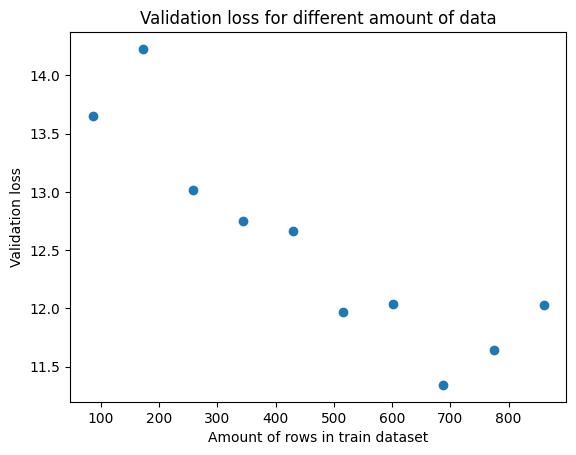

Correlation coefficient:  0.8703707700703591
Variance:  0.505869070601945


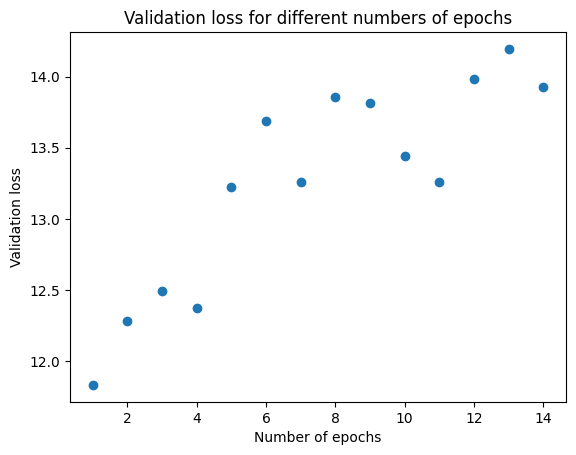

Average validation loss x:  [13.51366108 13.01298071 12.65650831 12.55372814 12.8090424  12.93347271
 13.08964129 13.12899445]
Average validation loss y:  [13.29480387 13.09860066 13.05562979 12.95586312 12.72746884 12.64115553]
Correlation coefficient x:  -0.11839352322956712
Correlation coefficient y:  -0.9842286193615896


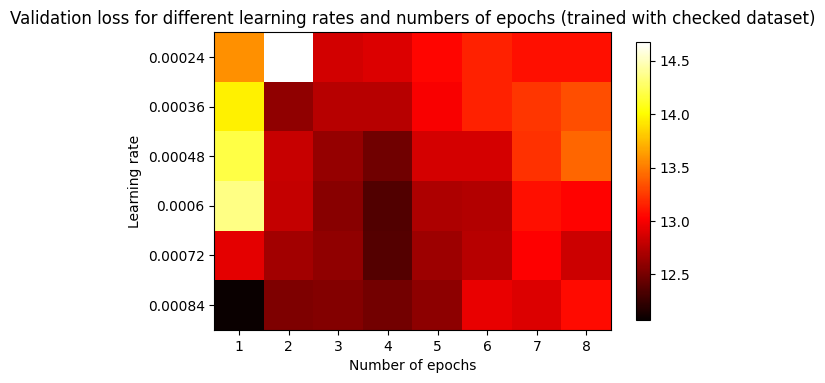

Average validation loss x:  [13.51366108 13.01298071 12.65650831 12.55372814 12.8090424  12.93347271
 13.08964129 13.12899445]
Average validation loss y:  [13.29480387 13.09860066 13.05562979 12.95586312 12.72746884 12.64115553]
Correlation coefficient x:  -0.11839352322956712
Correlation coefficient y:  -0.9842286193615896


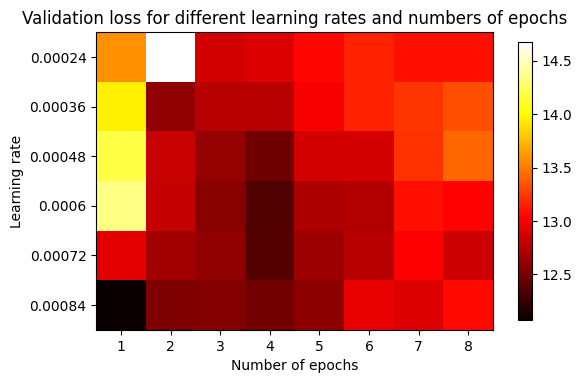

Correlation coefficient:  -0.3390714461858877
Variance:  0.38674870162645186


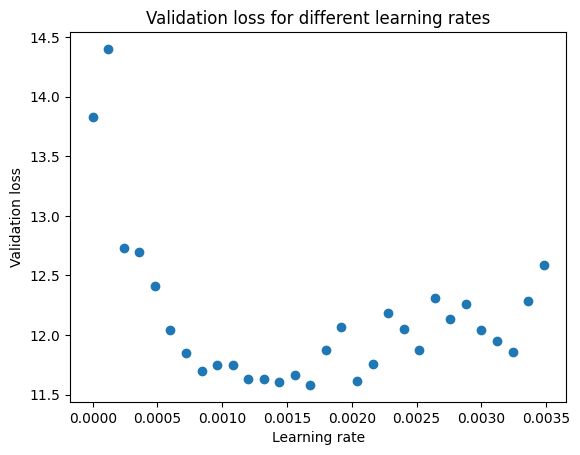

Average validation loss x:  [12.1669561  12.37400817 12.85706615 13.24243616 13.27444582 13.45520153]
Average validation loss y:  [12.94226651 13.05117257 12.97934363 12.79879031 12.77839081 12.82015009]
Correlation coefficient x:  0.9689095186172676
Correlation coefficient y:  -0.6553370117683479


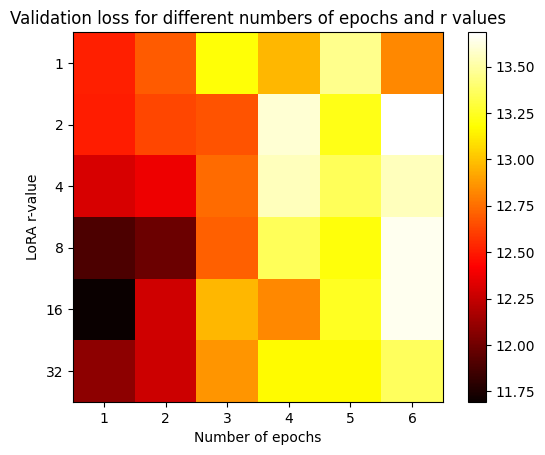

Correlation coefficient:  0.41725620434291544
Variance:  0.03019617037845538


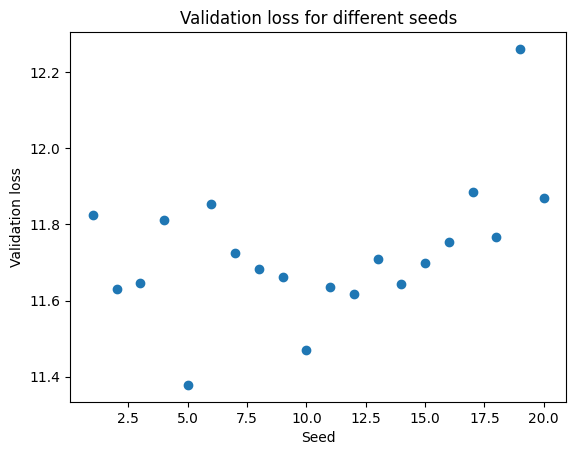

In [11]:
data_test_df = pd.read_csv('validation_loss/validation_loss_data_test.csv')
plot_in_1D(data_test_df, 'Amount of rows in train dataset', 'Validation loss', 'Validation loss for different amount of data')

epochs_test_df = pd.read_csv('validation_loss/validation_loss_epochs_test.csv')
plot_in_1D(epochs_test_df, 'Number of epochs', 'Validation loss', 'Validation loss for different numbers of epochs')

lr_e_checked_df = pd.read_csv('validation_loss/validation_loss_lr_e_checked.csv')
plot_in_2D(lr_e_checked_df, 'Number of epochs', 'Learning rate', 'Validation loss for different learning rates and numbers of epochs (trained with checked dataset)')

lr_epochs_df = pd.read_csv('validation_loss/validation_loss_lr_epochs.csv')
plot_in_2D(lr_epochs_df, 'Number of epochs', 'Learning rate', 'Validation loss for different learning rates and numbers of epochs')

lr_test_df = pd.read_csv('validation_loss/validation_loss_lr_test.csv')
plot_in_1D(lr_test_df, 'Learning rate', 'Validation loss', 'Validation loss for different learning rates')

r_epochs_df = pd.read_csv('validation_loss/validation_loss_r_epochs.csv')
plot_in_2D(r_epochs_df, 'Number of epochs', 'LoRA r-value', 'Validation loss for different numbers of epochs and r values')

seed_test_df = pd.read_csv('validation_loss/validation_loss_seed_test.csv')
plot_in_1D(seed_test_df, 'Seed', 'Validation loss', 'Validation loss for different seeds')
